In [31]:
# import all the required libraries
import pandas as pd
import numpy as np
import re
from collections import Counter
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold 
#load data
df = pd.read_csv("Emotion_Unbalanced_15000.csv")

In [2]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

15012

In [3]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [4]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'sadness': 4361,
         'joy': 5077,
         'love': 1244,
         'anger': 2063,
         'fear': 1717,
         'surprise': 1007})

In [5]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [6]:
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [7]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [8]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [9]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [10]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [11]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [12]:
# Remove the stopword
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                         feeling little low days back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [13]:
st = SnowballStemmer("english")
df['content'] = df['content'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['content'].head()

0                 feel aw job get posit succeed happen
1                                         alon feel aw
2                              feel littl low day back
3     also feel disillus someon claim valu truth fraud
4    wish knew everi word write write think useless...
Name: content, dtype: object

In [14]:
x = df.content
y = df.Emot

In [15]:
SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [16]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))


Train set has total 10828 entries with 28.02% sadness, 33.21% joy, 8.19% love, 13.07% anger, 11.09% fear, 6.42% surprise
Test set has total 4641 entries with 28.59% sadness, 31.91% joy, 7.69% love, 13.96% anger, 11.12% fear , 6.72% surprise


In [17]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [18]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [19]:
def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [20]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [21]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [28]:
def classifivation_report(mf, ng, spl):
    ug_cvec = CountVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [29]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [23]:
df['totalwords'] = [len(x.split()) for x in df['content'].tolist()]
# df['totalwords'].head()
df.totalwords.sum(axis = 0, skipna = True) 

139678

In [24]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

7830

In [25]:
cvec = CountVectorizer()
n_features = np.arange(2000,8001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


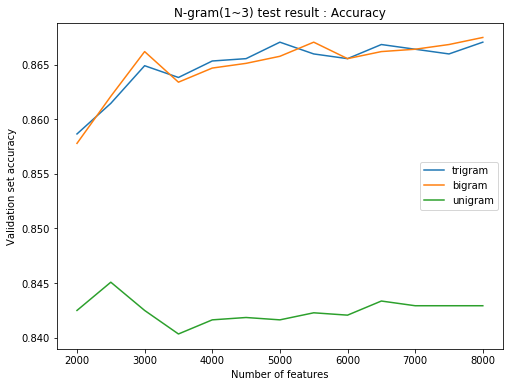

In [26]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [32]:
mf_ = 5500
ng_ = (1,2)
spl_= 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.71%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1227    45     8     31    11         5
joy            39  1350    53      8    13        18
love           17    91   239      7     2         1
anger          42    39     6    531    26         4
fear           21    27     2     12   421        33
surprise        7    17     2      4    26       256
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.82      0.86       648
         joy       0.84      0.82      0.83       516
        love       0.86      0.91      0.89      1481
       anger       0.77      0.67      0.72       357
        fear       0.91      0.92      0.92      1327
    surprise       0.81      0.82      0.81       312

   micro avg       0.87

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


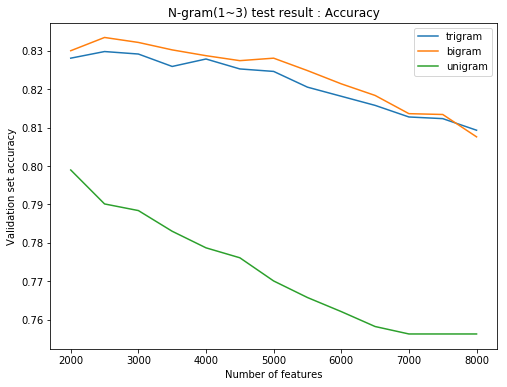

In [33]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [36]:
mf_ = 2500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 83.34%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1182    62    24     38    18         3
joy            45  1308    73     14    22        19
love           18    86   236      9     5         3
anger          52    50     9    500    31         6
fear           21    23     4     22   407        39
surprise       14    34     4      4    21       235
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.85      0.77      0.81       648
         joy       0.81      0.79      0.80       516
        love       0.84      0.88      0.86      1481
       anger       0.67      0.66      0.67       357
        fear       0.89      0.89      0.89      1327
    surprise       0.77      0.75      0.76       312

   micro avg       0.83

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


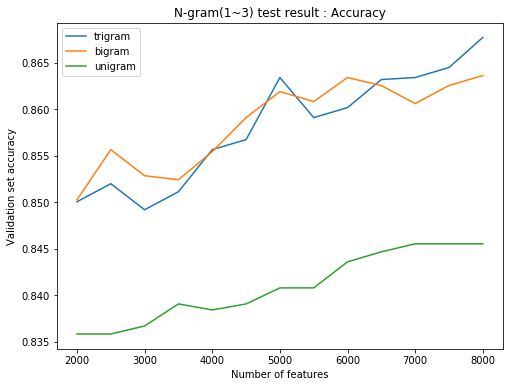

In [37]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [38]:
mf_ = 7800
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.64%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1218    38    11     36    16         8
joy            44  1307    73     19    16        22
love           20    69   257      6     4         1
anger          43    23     5    547    28         2
fear           17    22     2     12   432        31
surprise       10    14     3      1    24       260
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.84      0.86       648
         joy       0.83      0.84      0.83       516
        love       0.89      0.88      0.88      1481
       anger       0.73      0.72      0.73       357
        fear       0.90      0.92      0.91      1327
    surprise       0.80      0.83      0.82       312

   micro avg       0.87

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


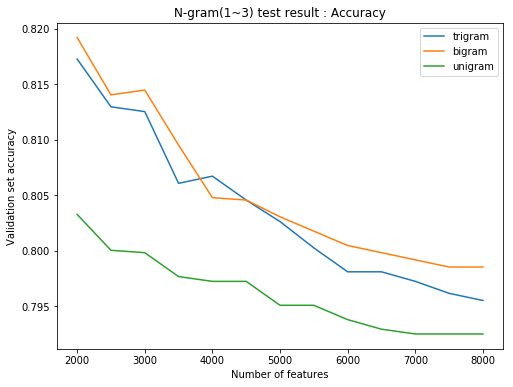

In [50]:
cls = SVC(kernel='rbf', random_state=0, gamma=.1, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [52]:
mf_ = 3000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 81.45%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1217    75     8     15     6         6
joy            34  1400    22      2     5        18
love           27   170   155      3     0         2
anger          76   107     3    429    26         7
fear           42    87     1      2   346        38
surprise       16    50     1      1    11       233
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.95      0.66      0.78       648
         joy       0.88      0.67      0.76       516
        love       0.74      0.95      0.83      1481
       anger       0.82      0.43      0.57       357
        fear       0.86      0.92      0.89      1327
    surprise       0.77      0.75      0.76       312

   micro avg       0.81

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


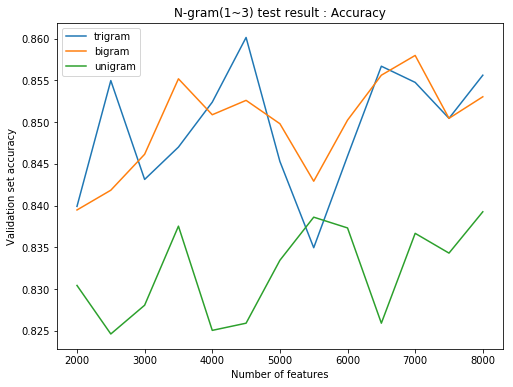

In [42]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [43]:
mf_ = 6500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 85.95%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1186    61     8     41    20        11
joy            47  1325    45     19    16        29
love           21    93   220     14     5         4
anger          38    30     3    540    30         7
fear           11    17     2     11   436        39
surprise        4     8     1      1    16       282
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.86      0.83      0.85       648
         joy       0.83      0.84      0.84       516
        love       0.86      0.89      0.88      1481
       anger       0.79      0.62      0.69       357
        fear       0.91      0.89      0.90      1327
    surprise       0.76      0.90      0.82       312

   micro avg       0.86

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8545572074983839
0.8558500323206205
0.8720103425985779
0.8597285067873304
0.8552036199095022
0.8642533936651584
0.870071105365223
0.8513251454427925
0.8623141564318035
0.8557567917205692
Avg Accuracy 0.8601070301739961


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


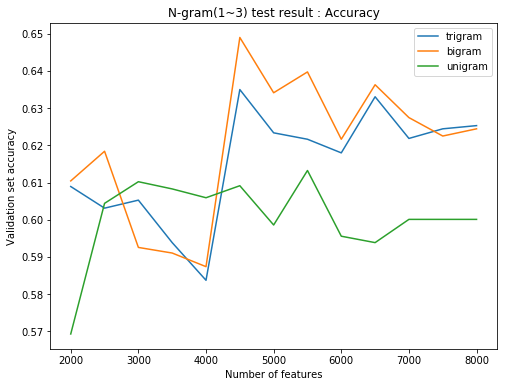

In [44]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [45]:
mf_ = 4500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 64.90%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness       917   216    32    119    41         2
joy           134  1143    64     94    33        13
love           48   139   133     26     8         3
anger          95   119    11    391    29         3
fear           58    73     8     64   288        25
surprise       36    75     6     24    31       140
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.54      0.60      0.57       648
         joy       0.67      0.56      0.61       516
        love       0.65      0.77      0.70      1481
       anger       0.52      0.37      0.44       357
        fear       0.71      0.69      0.70      1327
    surprise       0.75      0.45      0.56       312

   micro avg       0.65

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


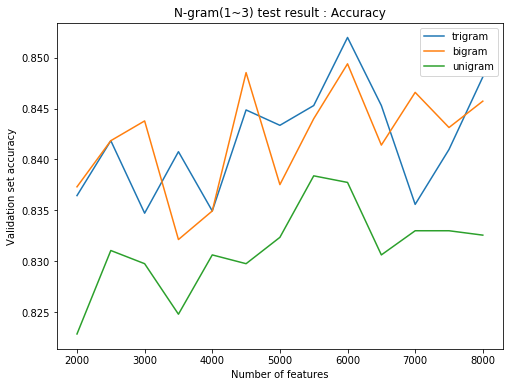

In [46]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [47]:
mf_ = 6000
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 84.90%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1162    57    18     49    32         9
joy            68  1288    47     26    28        24
love           12    99   231     10     2         3
anger          30    33     3    558    21         3
fear           19    16     0     21   427        33
surprise        4     5     1      1    27       274
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.84      0.86      0.85       648
         joy       0.80      0.83      0.81       516
        love       0.86      0.87      0.86      1481
       anger       0.77      0.65      0.70       357
        fear       0.90      0.88      0.89      1327
    surprise       0.79      0.88      0.83       312

   micro avg       0.85

In [54]:
x_train.shape

(10828,)